<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2023-10-04 14:21:36--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2023-10-04 14:21:37--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip.1’

2-ab.zip.1          100%[===================>]  12.80M  --.-KB/s    in 0.1s    

2023-10-04 14:21:38 (88.6 MB/s) - ‘2-ab.zip.1’ saved [13423991/13423991]

Archive:  2-ab.zip
replace ._2-ab? [y]es, [n]

In [ ]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

Exception: ignored

# Part 1 : Forward and backward passes "by hands"

In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    std_dev=0.3

    params["Wh"] =torch.randn((nh, nx)) #torch.zeros((nh, nx)) + std_dev * torch.randn((nh, nx))
    params["Wy"] = torch.randn((ny, nh)) #torch.zeros((ny, nh)) + std_dev * torch.randn((ny, nh))
    params["bh"] = torch.randn(nh)#torch.zeros(nh) + std_dev * torch.randn(nh)
    params["by"] =  torch.randn(ny) #torch.zeros(ny) + std_dev * torch.randn(ny)

    ####################
    ##      END        #
    ####################
    return params

b=np.array([1,2])
b=np.resize(b, (1,2))

print(b.shape)
import numpy.matlib
print(np.matlib.repmat(b,5,1))
print(torch.randn(3).size())

(1, 2)
[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]
torch.Size([3])


In [ ]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X
    outputs["htilde"] = torch.mm(X,params["Wh"].T) + params['bh']
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"],params["Wy"].T) + params['by']
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=1)

    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [ ]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    batch_size= Y.shape[0]

    L = -torch.mean(torch.sum(Y * torch.log(Yhat),dim=1))

    _,indsY=torch.max (Y, 1)
    _,indsYhat=torch.max (Yhat, 1)

    acc = torch.sum(indsY==indsYhat) / batch_size


    ####################
    ##      END        #
    ####################

    return L, acc

In [ ]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh
    grads_Y_tilde= (outputs["yhat"]-Y) / bsize

    grads_H_tilde= torch.mm(grads_Y_tilde,params["Wy"]) * (1- outputs["h"]**2)

    grads["Wy"] = torch.mm(grads_Y_tilde.T,outputs["h"])
    grads["Wh"] = torch.mm(grads_H_tilde.T,outputs["X"])
    grads["by"] = torch.sum(grads_Y_tilde.T,dim=1)
    grads["bh"] = torch.sum(grads_H_tilde.T,dim=1)

    print()


    ####################
    ##      END        #
    ####################
    return grads

In [ ]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -= eta * grads["Wh"]
    params["Wy"] -= eta * grads["Wy"]
    params["bh"] -= eta * grads["bh"]
    params["by"] -= eta * grads["by"]

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        Yhat, outputs=forward(params, X)
        L,acc=loss_accuracy(Yhat, Y)
        grads=backward(params, outputs, Y)
        params=sgd(params, grads, eta)





    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)
data.plot_data_with_grid(Ygrid, title)
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    params["Wh"] = torch.randn(nh,nx, requires_grad=True)
    params["Wy"] = torch.randn(ny,nh, requires_grad=True)
    params["bh"] = torch.randn(nh, requires_grad=True)
    params["by"] = torch.randn(ny ,requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [ ]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators
    with torch.no_grad():
      params["Wh"] -= eta * params["Wh"].grad
      params["Wh"].grad.zero_()
      params["Wy"] -= eta * params["Wy"].grad
      params["Wy"].grad.zero_()
      params["bh"] -= eta * params["bh"].grad
      params["bh"].grad.zero_()
      params["by"] -= eta * params["by"].grad
      params["by"].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd
        Yhat, outputs=forward(params, X)
        L,acc=loss_accuracy(Yhat, Y)
        L.backward()
        params=sgd(params, eta)


    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [ ]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax()
    )

    loss = torch.nn.MSELoss() #torch.nn.CrossEntropyLoss()
    #loss = torch.nn.CrossEntropyLoss()
    ####################
    ##      END        #
    ####################

    return model, loss

In [ ]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function
    batch_size = Y.shape[0]
    L = loss(Yhat,Y)

    _,indsY=torch.max (Y, 1)
    _,indsYhat=torch.max (Yhat, 1)

    acc = torch.sum(indsY==indsYhat) / batch_size

    ####################
    ##      END        #
    ####################

    return L, acc

In [ ]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
      for param in model.parameters():
        param-= eta * param.grad
      model.zero_grad()


    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        Yhat=model(X)
        L,_=loss_accuracy(loss,Yhat,Y)
        L.backward()
        model= sgd(model,eta)


    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 4 : Simplification of the SGD with `torch.optim`

In [ ]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax()
    )

    loss = torch.nn.MSELoss() #torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat=model(X)
        optim.zero_grad()
        L,_= loss_accuracy(loss,Yhat,Y)
        L.backward()
        optim.step()


    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

Iter 0: Acc train 0.8% (0.03), acc test 0.8% (0.03)
Iter 1: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 2: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 3: Acc train 0.9% (0.02), acc test 0.9% (0.02)
Iter 4: Acc train 0.9% (0.02), acc test 0.9% (0.01)
Iter 5: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 6: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 7: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 8: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 9: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 10: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 11: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 12: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 13: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 14: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 15: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 16: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 17: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Iter 18: Acc train 0.9% (0.01), acc test 0.9% (0.01)
Ite

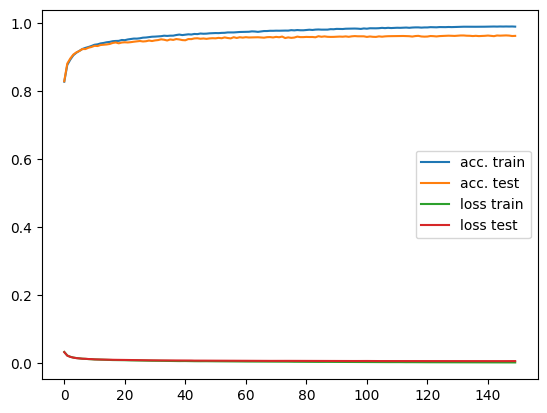

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03


model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat=model(X)
        L,_= loss_accuracy(loss,Yhat,Y)
        L.backward()
        optim.step()
        optim.zero_grad()


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?

no it doesnt work because the data is not linearly separable...

- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?

the best one is the radial basis function 'rbf'.....


- Does the parameter C of regularization have an impact? Why ?


no impact because the data is almost perfect and there are no outliers.........

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

C:  0.4999
Accuracy : 95.50


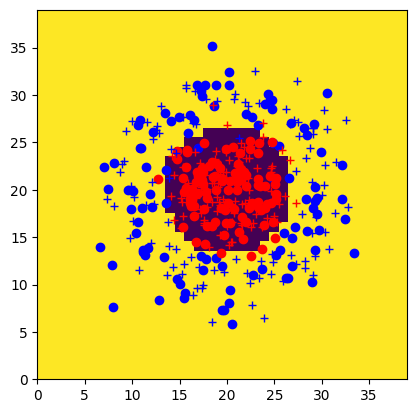

C:  0.5009
Accuracy : 95.50


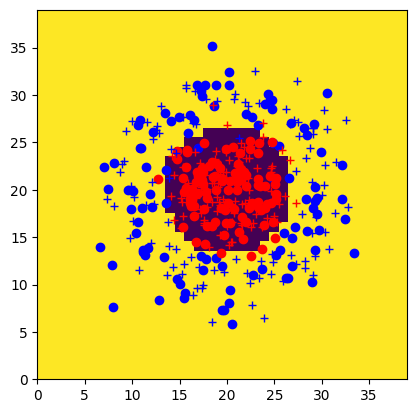

C:  0.5019
Accuracy : 95.50


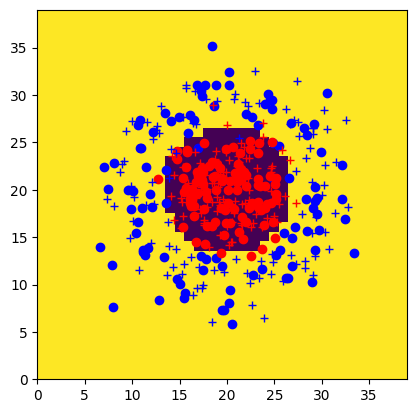

C:  0.5029
Accuracy : 95.50


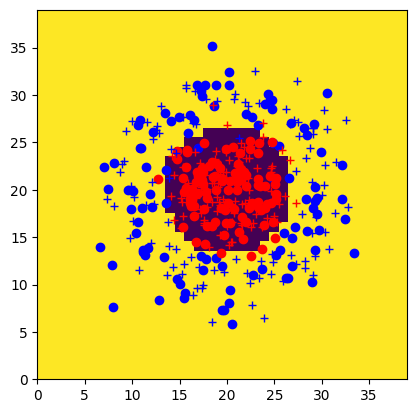

C:  0.5039
Accuracy : 95.50


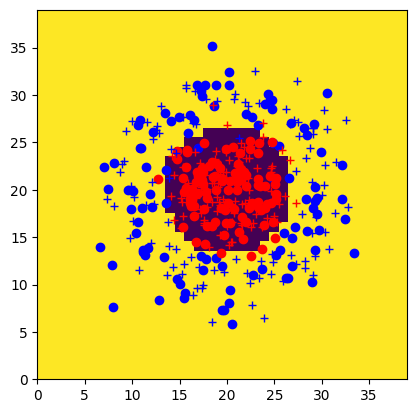

C:  0.5049
Accuracy : 95.50


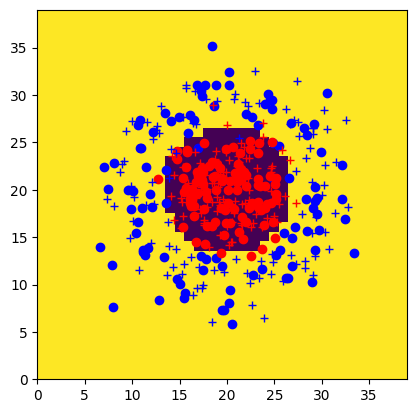

C:  0.5059
Accuracy : 95.50


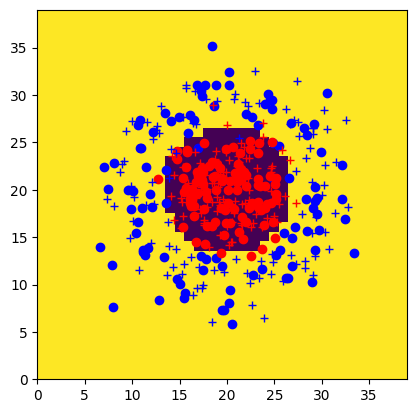

C:  0.5069
Accuracy : 95.50


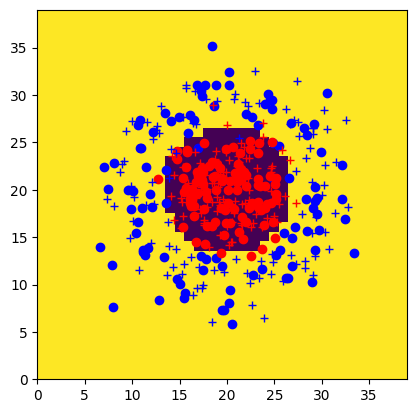

C:  0.5079
Accuracy : 95.50


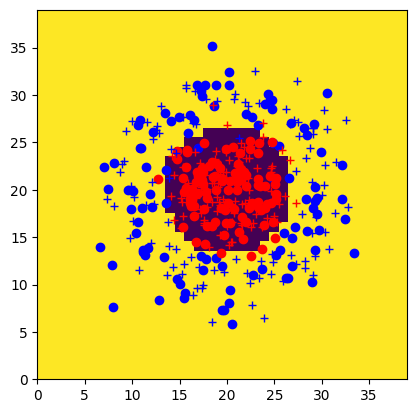

C:  0.5089
Accuracy : 95.50


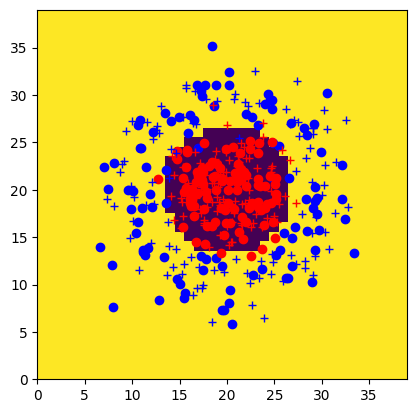

C:  0.5099
Accuracy : 95.50


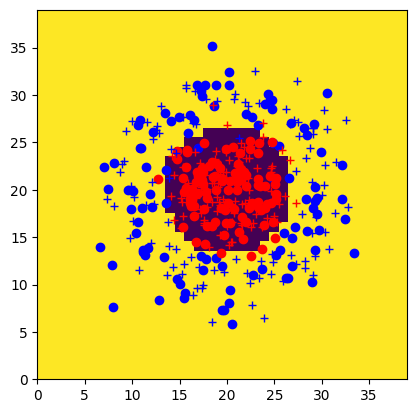

C:  0.5109
Accuracy : 95.50


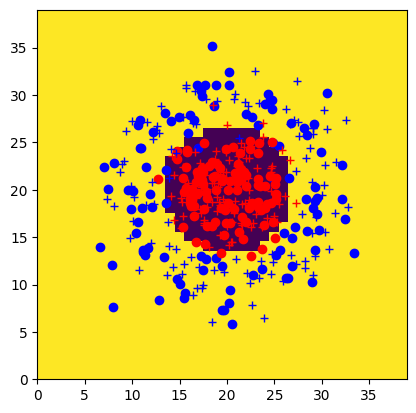

C:  0.5119
Accuracy : 95.50


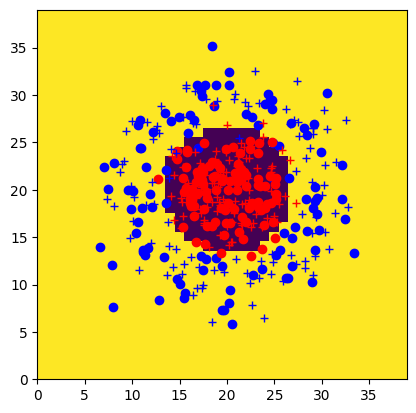

C:  0.5129
Accuracy : 95.50


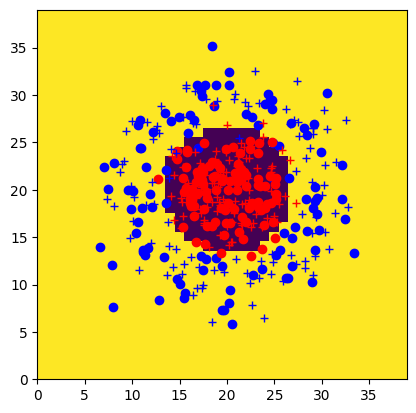

C:  0.5139
Accuracy : 95.50


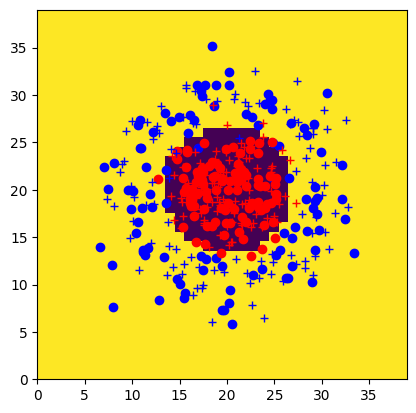

C:  0.5149
Accuracy : 95.50


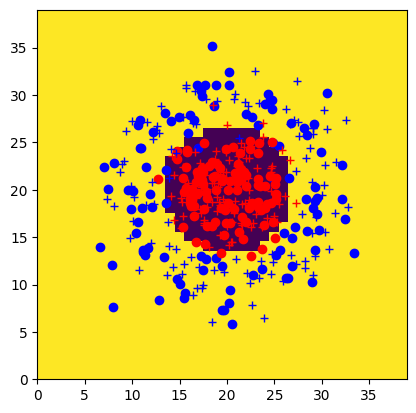

C:  0.5159
Accuracy : 95.50


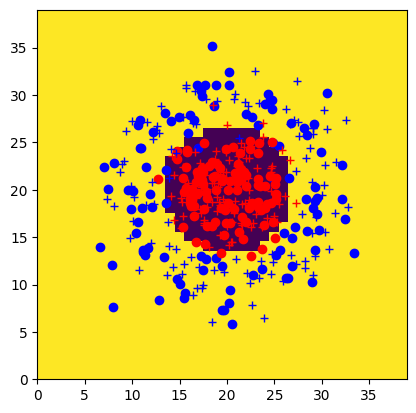

C:  0.5169
Accuracy : 95.50


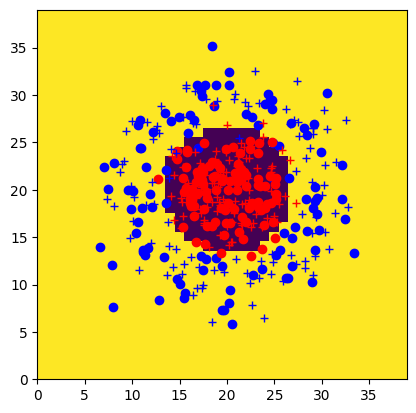

C:  0.5179
Accuracy : 95.50


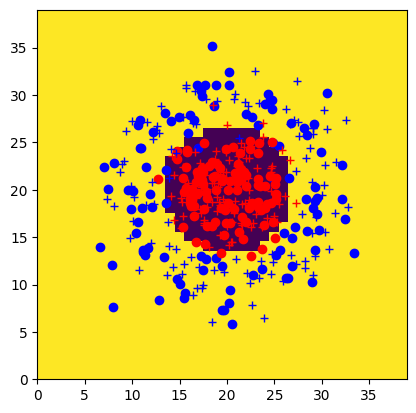

C:  0.5189
Accuracy : 95.50


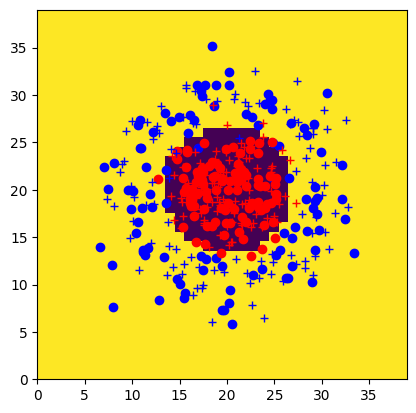

C:  0.5199
Accuracy : 95.50


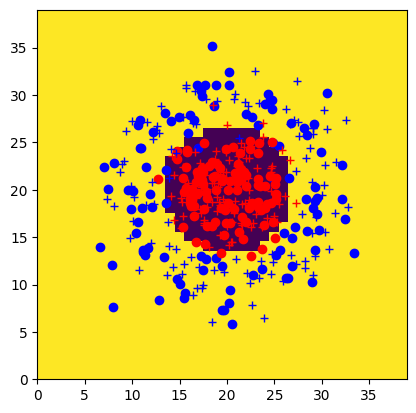

C:  0.5209
Accuracy : 95.50


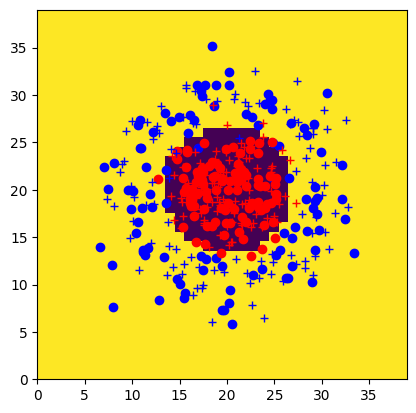

C:  0.5219
Accuracy : 95.50


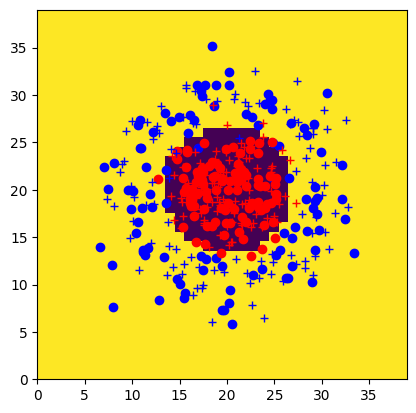

C:  0.5229
Accuracy : 95.50


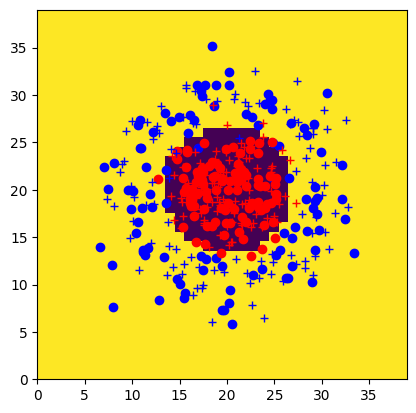

C:  0.5239
Accuracy : 95.50


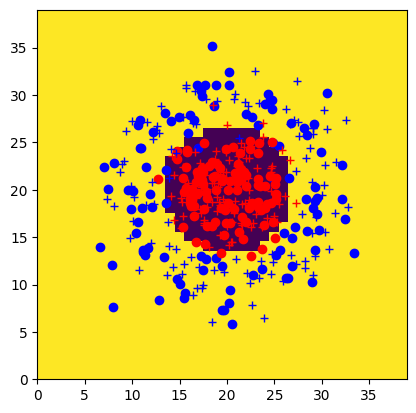

C:  0.5249
Accuracy : 95.50


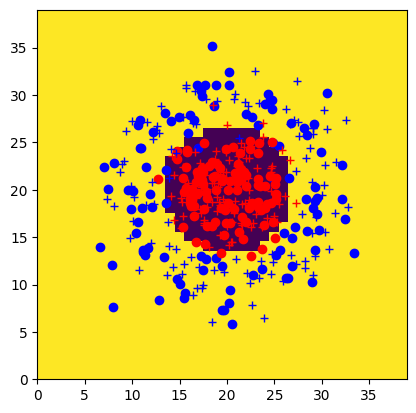

C:  0.5259
Accuracy : 95.50


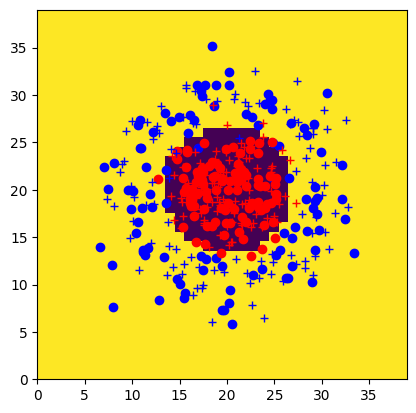

C:  0.5269
Accuracy : 95.50


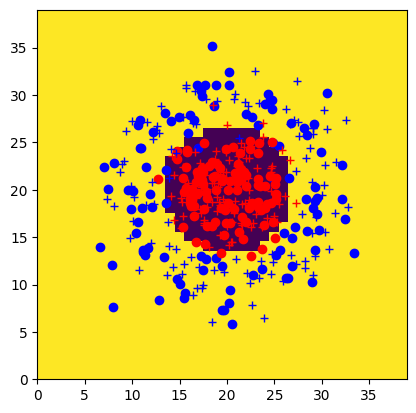

C:  0.5279
Accuracy : 95.50


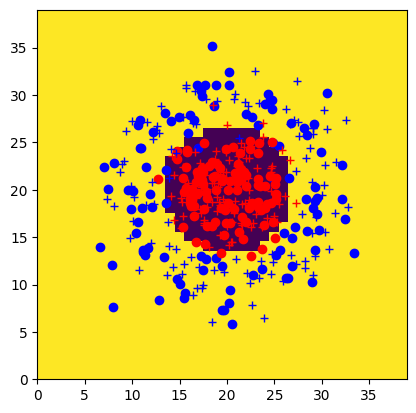

C:  0.5289
Accuracy : 95.50


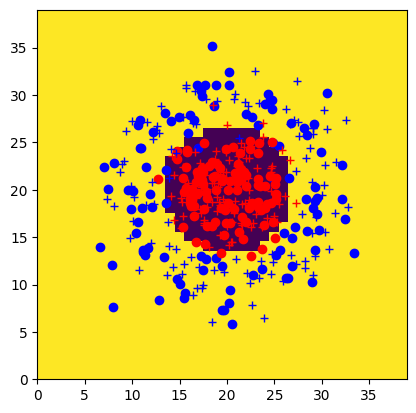

C:  0.5299
Accuracy : 95.50


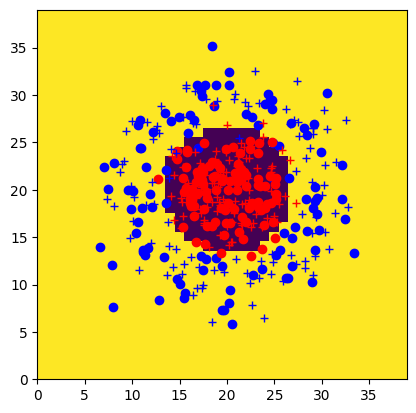

C:  0.5309
Accuracy : 95.50


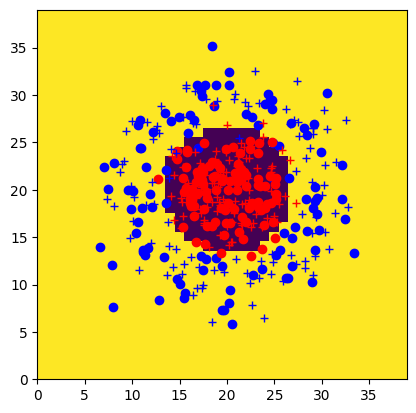

C:  0.5319
Accuracy : 95.50


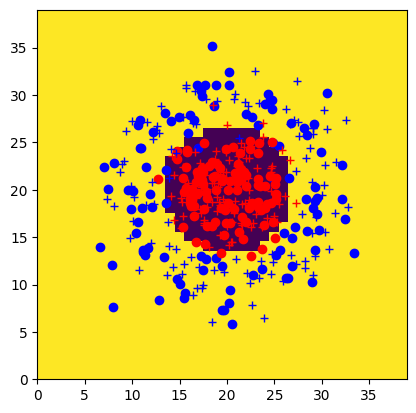

C:  0.5329
Accuracy : 95.50


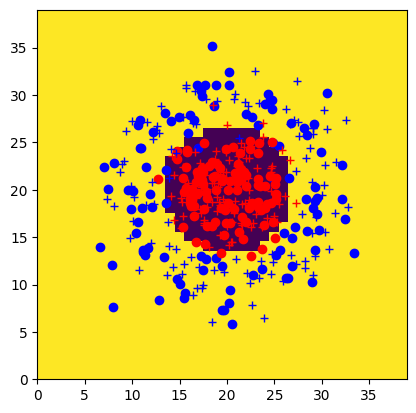

C:  0.5339
Accuracy : 95.50


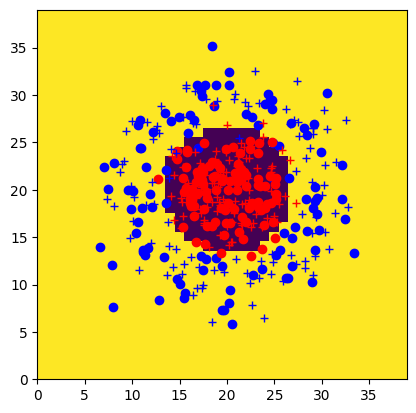

C:  0.5349
Accuracy : 95.50


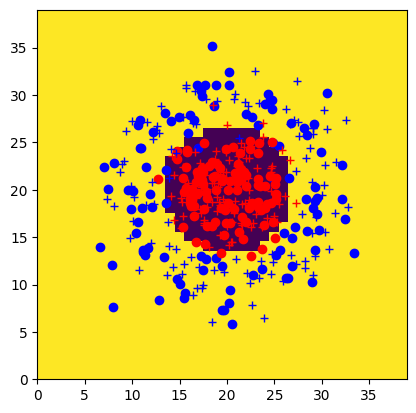

C:  0.5359
Accuracy : 95.50


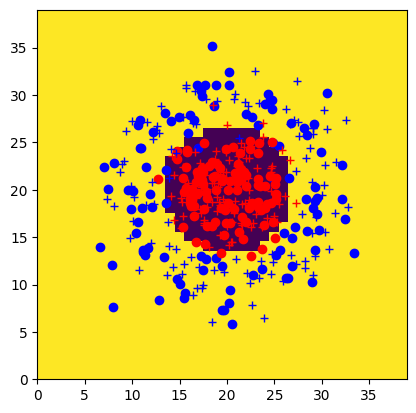

C:  0.5369
Accuracy : 95.50


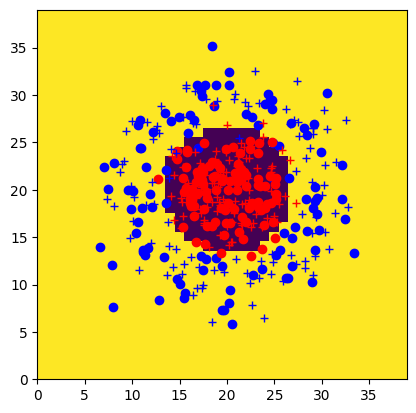

C:  0.5379
Accuracy : 95.50


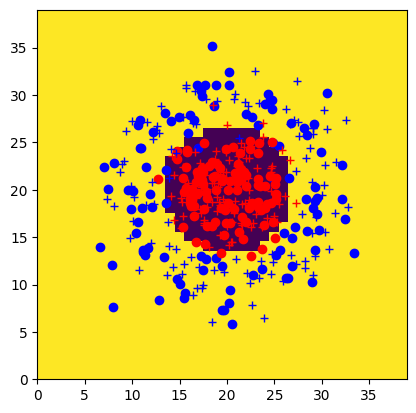

C:  0.5389
Accuracy : 95.50


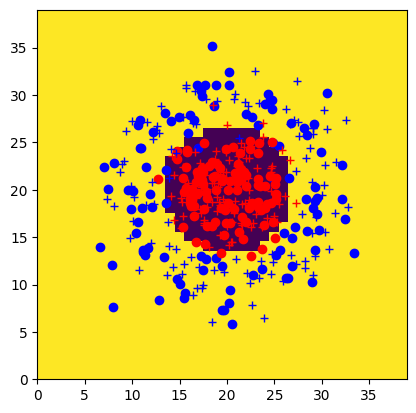

C:  0.5399
Accuracy : 95.50


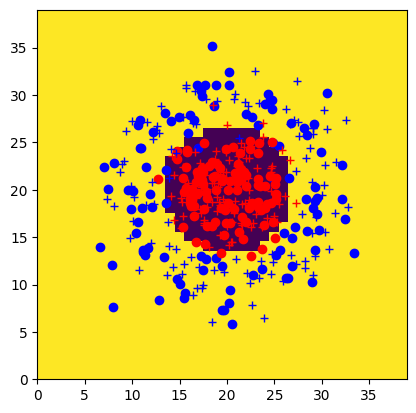

C:  0.5409
Accuracy : 95.50


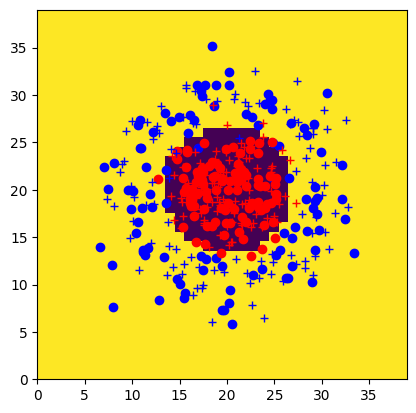

C:  0.5419
Accuracy : 95.50


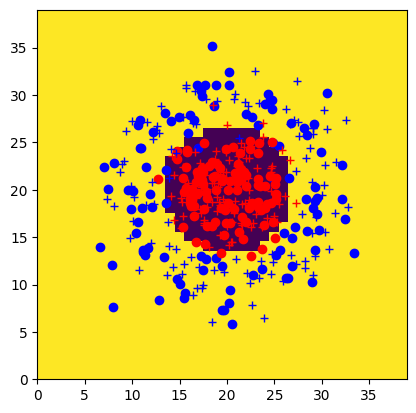

C:  0.5429
Accuracy : 95.50


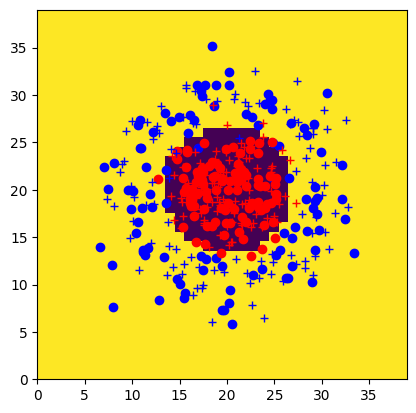

C:  0.5439
Accuracy : 95.50


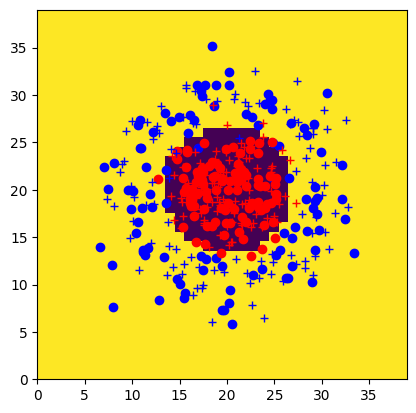

C:  0.5449
Accuracy : 95.50


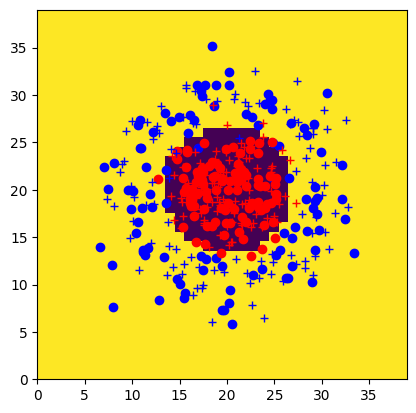

C:  0.5459
Accuracy : 95.50


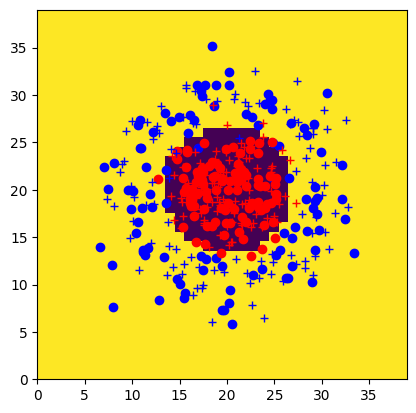

C:  0.5469
Accuracy : 95.50


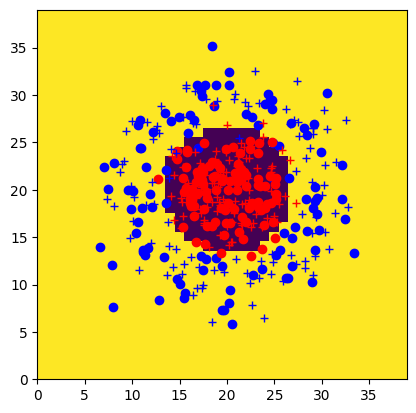

C:  0.5479
Accuracy : 95.50


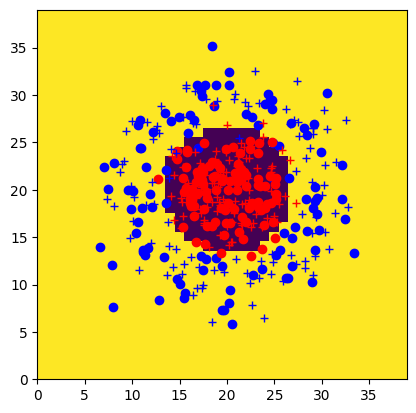

C:  0.5489
Accuracy : 95.50


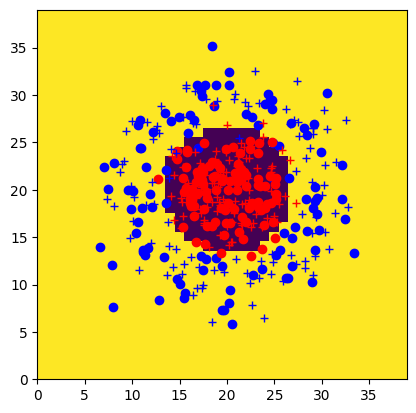

C:  0.5499
Accuracy : 95.50


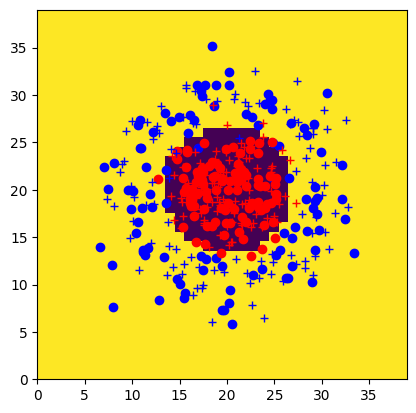

C:  0.5509000000000001
Accuracy : 95.50


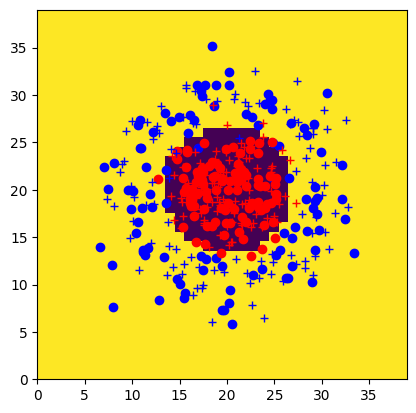

C:  0.5519000000000001
Accuracy : 95.50


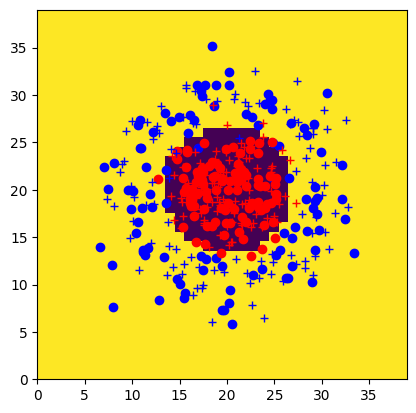

C:  0.5529000000000001
Accuracy : 95.50


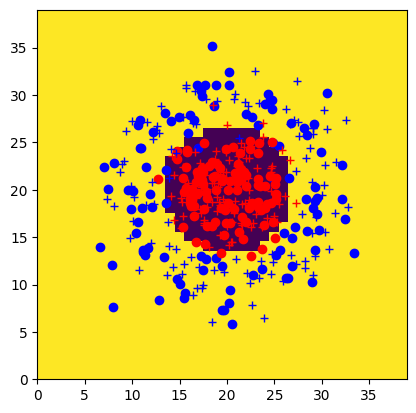

C:  0.5539000000000001
Accuracy : 95.50


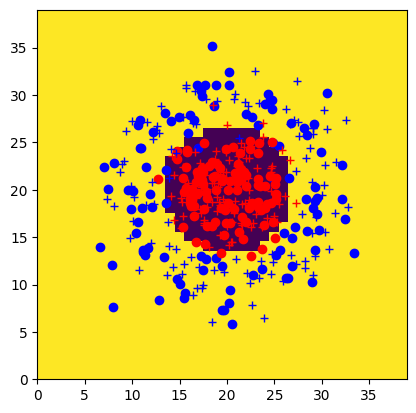

C:  0.5549000000000001
Accuracy : 95.50


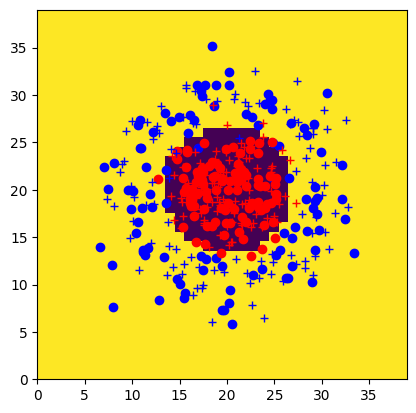

C:  0.5559000000000001
Accuracy : 95.50


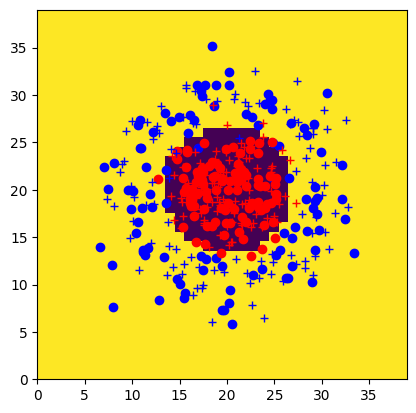

C:  0.5569000000000001
Accuracy : 95.50


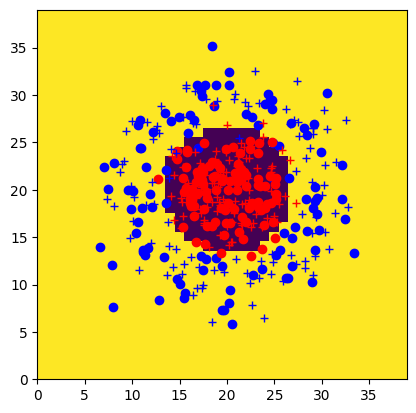

C:  0.5579000000000001
Accuracy : 95.50


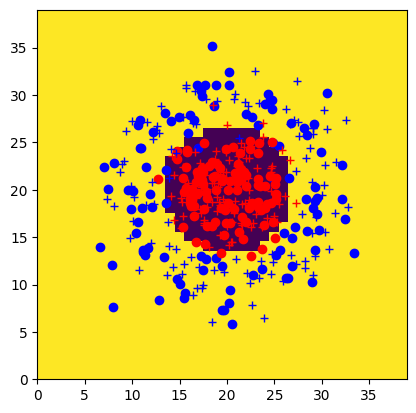

C:  0.5589000000000001
Accuracy : 95.50


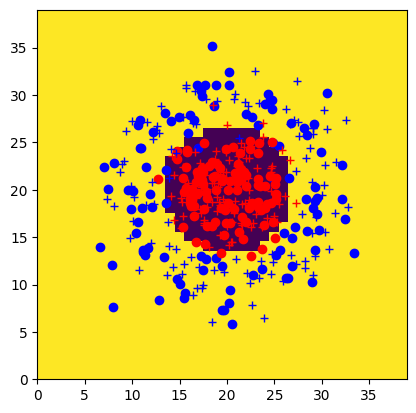

C:  0.5599000000000001
Accuracy : 95.50


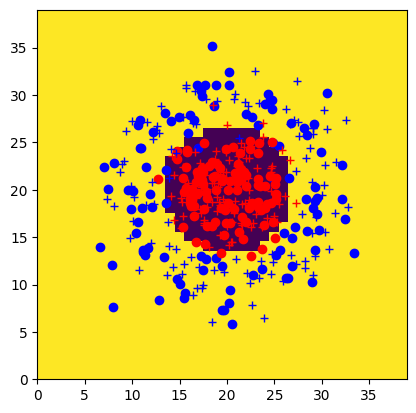

C:  0.5609000000000001
Accuracy : 95.50


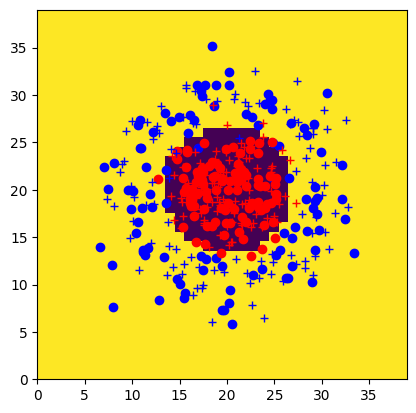

C:  0.5619000000000001
Accuracy : 95.50


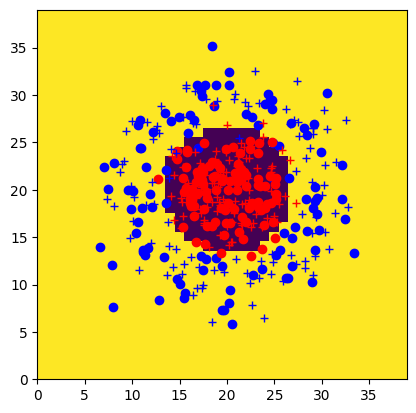

C:  0.5629000000000001
Accuracy : 95.50


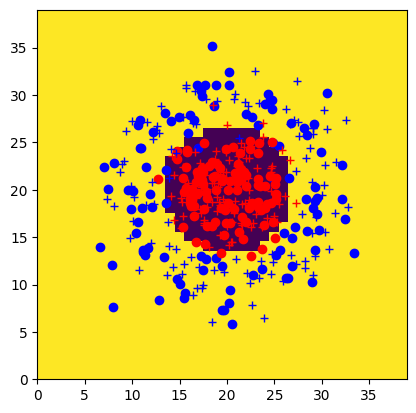

C:  0.5639000000000001
Accuracy : 95.50


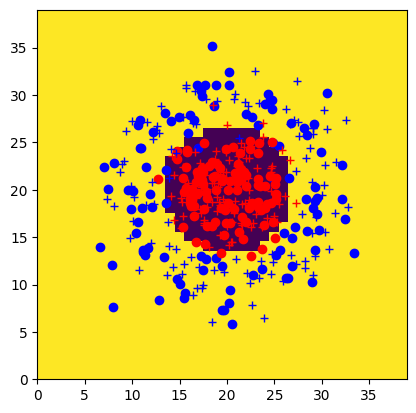

C:  0.5649000000000001
Accuracy : 95.50


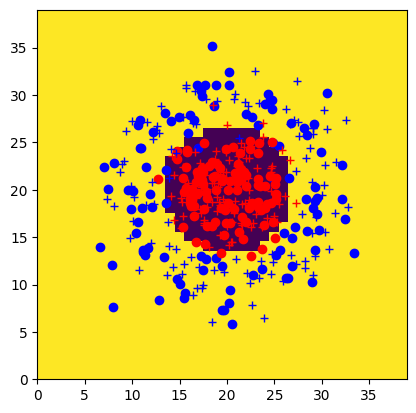

C:  0.5659000000000001
Accuracy : 95.50


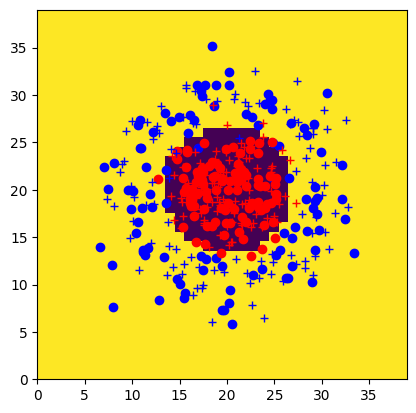

C:  0.5669000000000001
Accuracy : 95.50


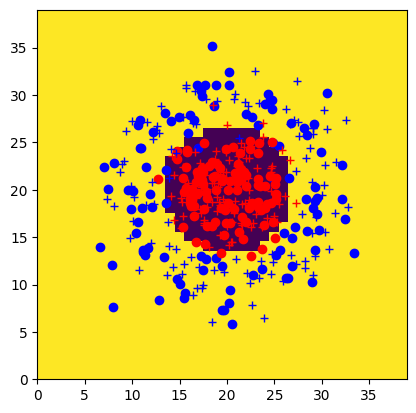

C:  0.5679000000000001
Accuracy : 95.50


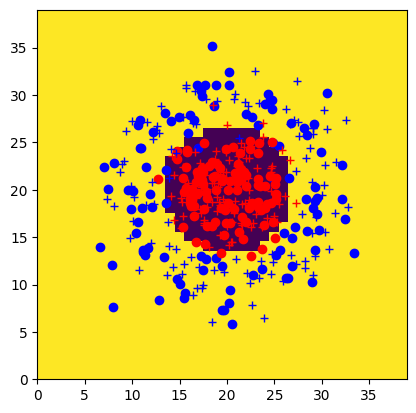

C:  0.5689000000000001
Accuracy : 95.50


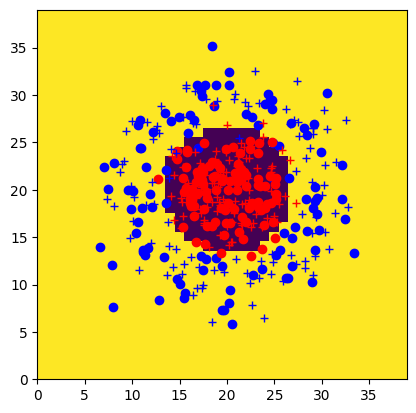

C:  0.5699000000000001
Accuracy : 95.50


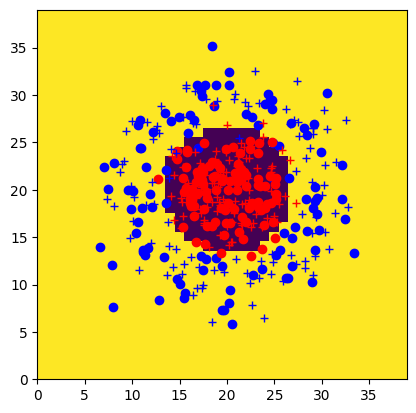

C:  0.5709000000000001
Accuracy : 95.50


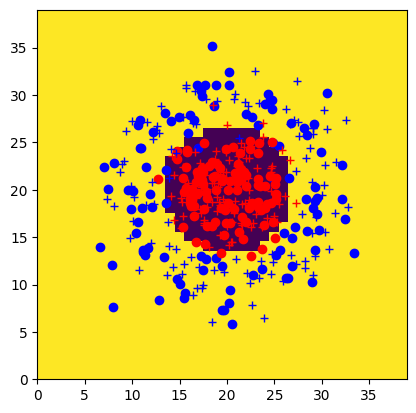

C:  0.5719000000000001
Accuracy : 95.50


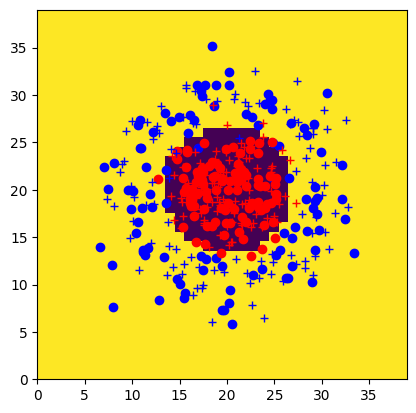

C:  0.5729000000000001
Accuracy : 95.50


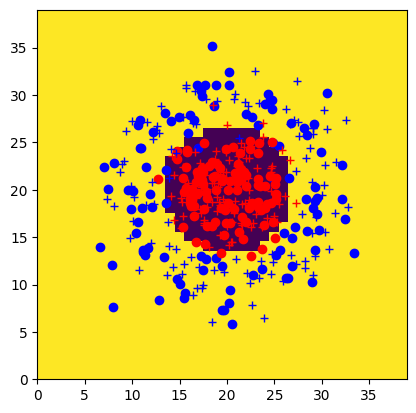

C:  0.5739000000000001
Accuracy : 95.50


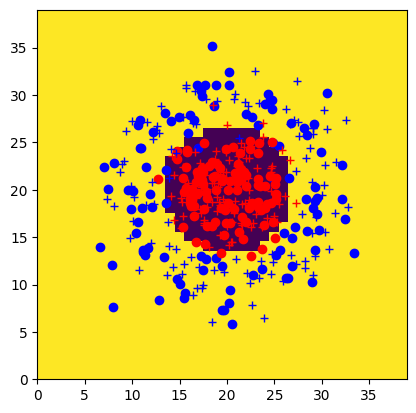

C:  0.5749000000000001
Accuracy : 95.50


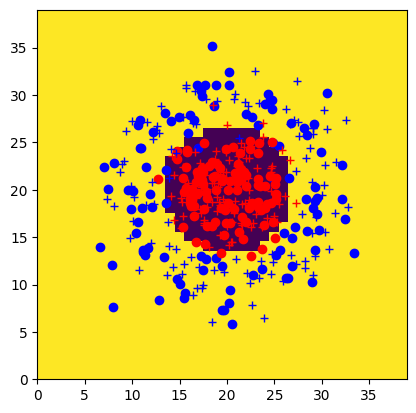

C:  0.5759000000000001
Accuracy : 95.50


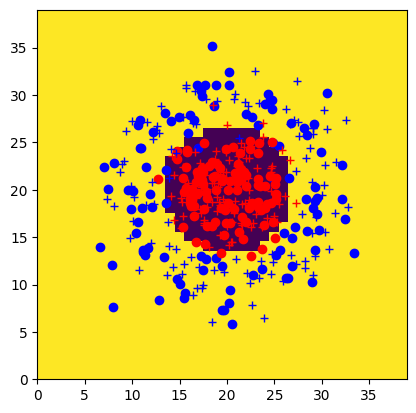

C:  0.5769000000000001
Accuracy : 95.50


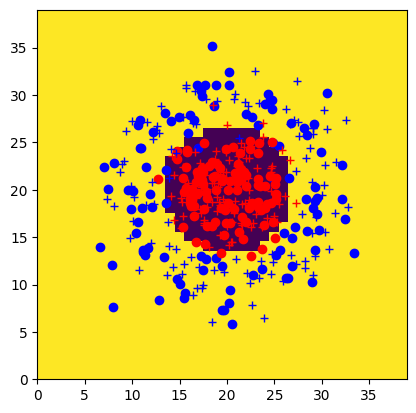

C:  0.5779000000000001
Accuracy : 95.50


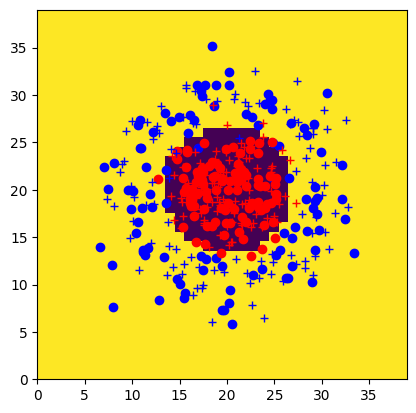

C:  0.5789000000000001
Accuracy : 95.50


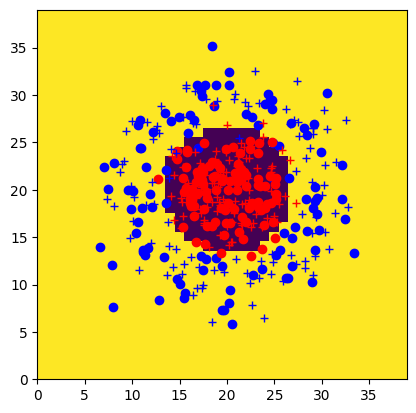

C:  0.5799000000000001
Accuracy : 95.50


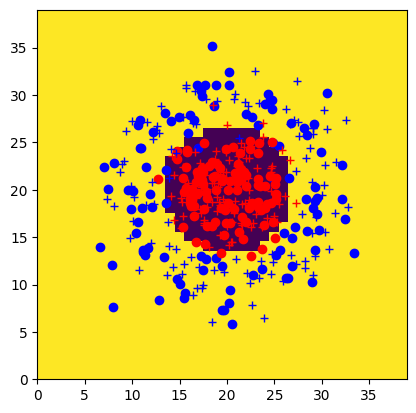

C:  0.5809000000000001
Accuracy : 95.50


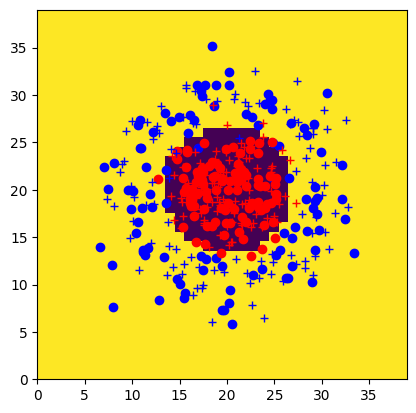

C:  0.5819000000000001
Accuracy : 95.50


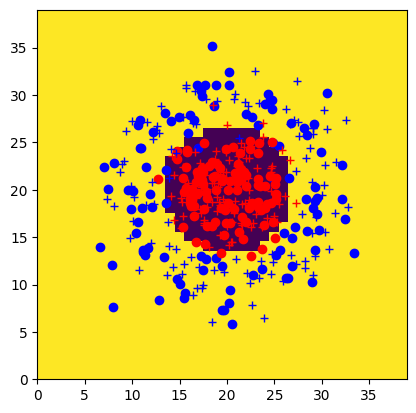

C:  0.5829000000000001
Accuracy : 95.50


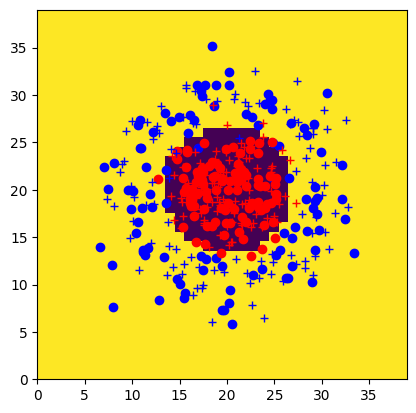

C:  0.5839000000000001
Accuracy : 95.50


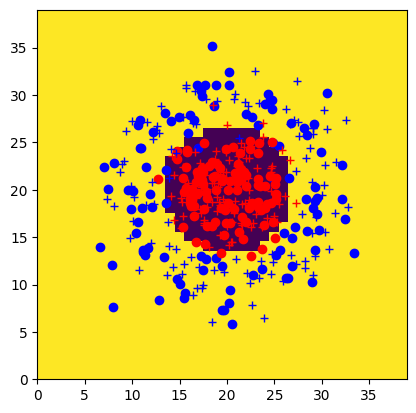

C:  0.5849000000000001
Accuracy : 95.50


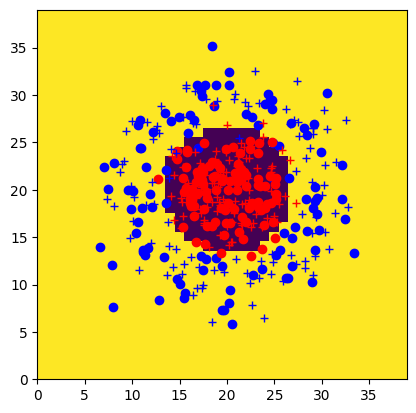

C:  0.5859000000000001
Accuracy : 95.50


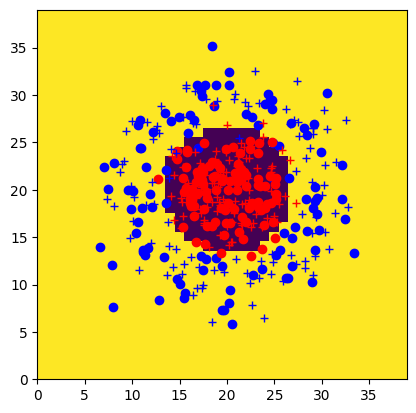

C:  0.5869000000000001
Accuracy : 95.50


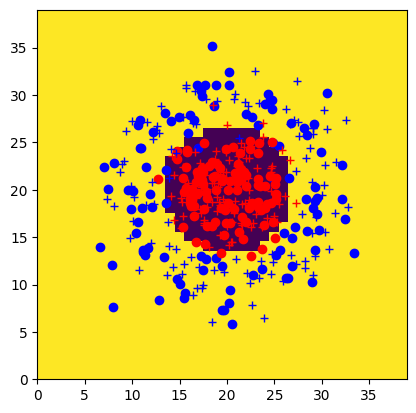

C:  0.5879000000000001
Accuracy : 95.50


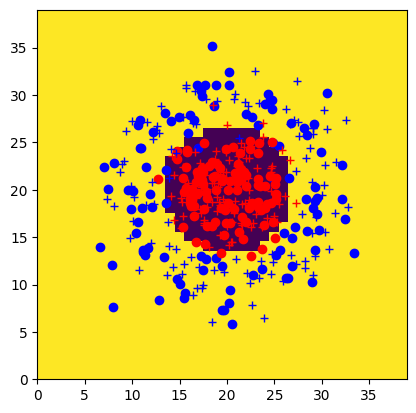

C:  0.5889000000000001
Accuracy : 95.50


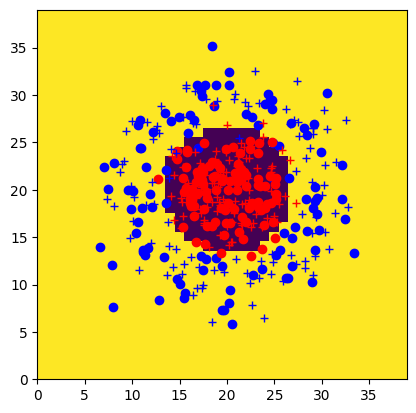

C:  0.5899000000000001
Accuracy : 95.50


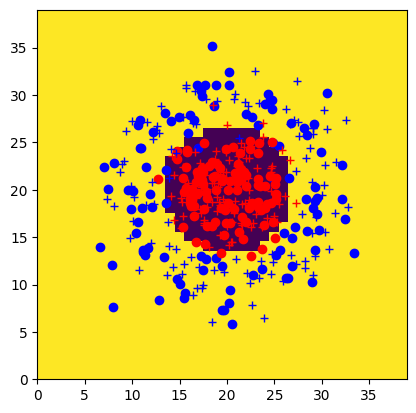

C:  0.5909000000000001
Accuracy : 95.50


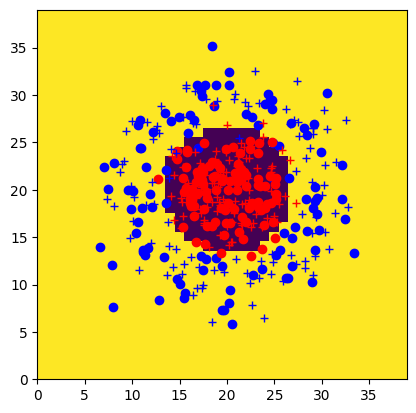

C:  0.5919000000000001
Accuracy : 95.50


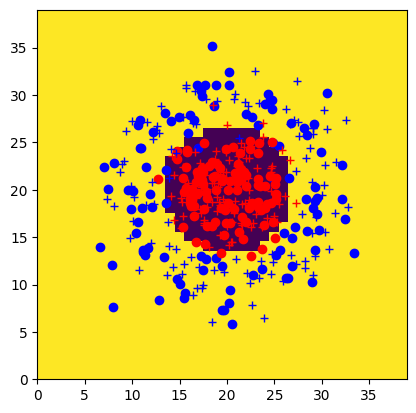

C:  0.5929000000000001
Accuracy : 95.50


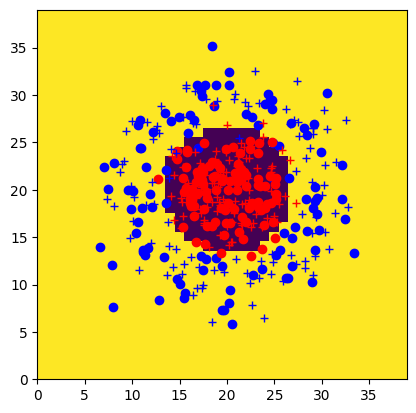

C:  0.5939000000000001
Accuracy : 95.50


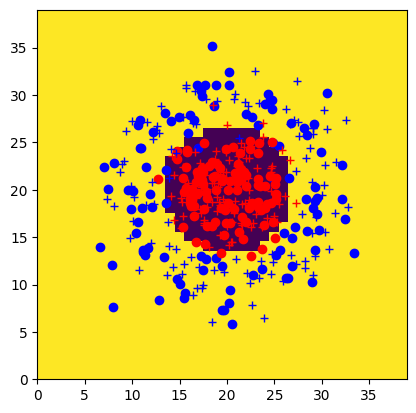

C:  0.5949000000000001
Accuracy : 95.50


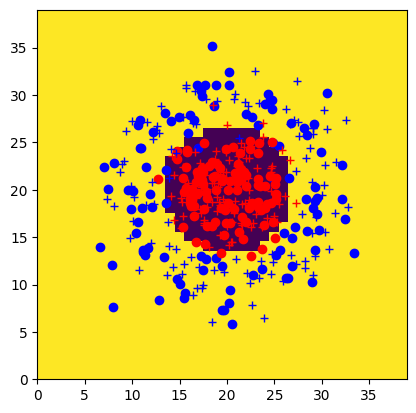

C:  0.5959000000000001
Accuracy : 95.50


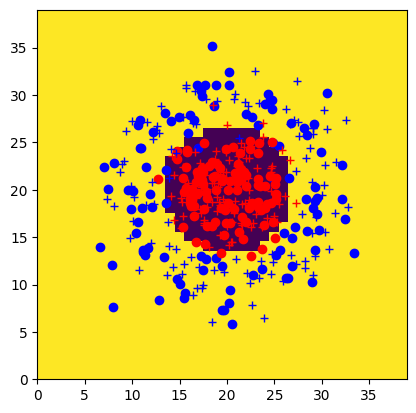

C:  0.5969000000000001
Accuracy : 95.50


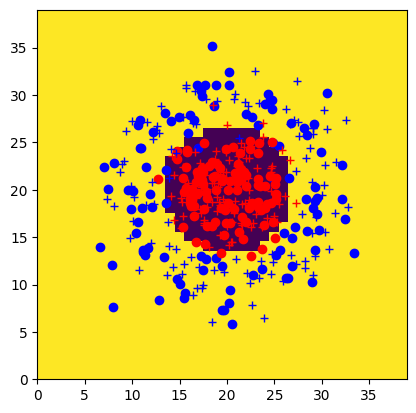

C:  0.5979000000000001
Accuracy : 95.50


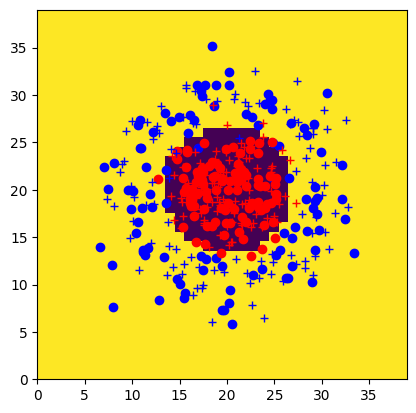

C:  0.5989000000000001
Accuracy : 95.50


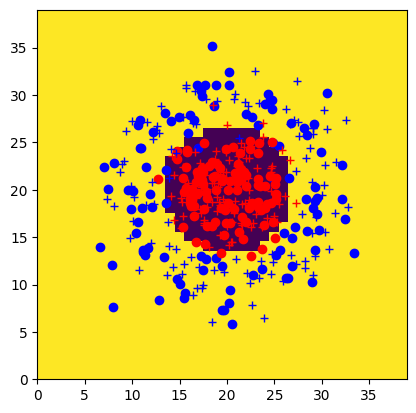

C:  0.5999000000000001
Accuracy : 95.50


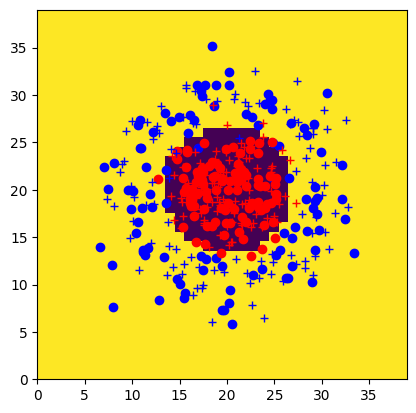

In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################
c = np.arange(0.4999,0.6,0.001)
k = ['poly', 'rbf', 'linear', 'sigmoid']

for ci in c:
  svm = sklearn.svm.SVC(kernel="rbf", C=ci)
  svm.fit(Xtrain, Ytrain)

  ## Print results
  print("C: ", ci)
  Ytest_pred = svm.predict(Xtest)
  accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
  print(f"Accuracy : {100 * accuracy:.2f}")
  Ygrid_pred = svm.predict(Xgrid)
  plot_svm_predictions(data, Ygrid_pred)

###########################